In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans
from sklearn.preprocessing import OrdinalEncoder,LabelEncoder
from sklearn.preprocessing import StandardScaler


In [2]:
df=pd.read_csv(r'C:\Users\ASUS\Desktop\PythonProjects\8_important_projects\Inventory_Management\Data_set\sales_data_sample.csv',encoding='ISO-8859-1')

In [3]:
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [5]:
df.describe()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.00000,2823.000000
mean,10258.725115,35.092809,83.658544,6.466171,3553.889072,2.717676,7.092455,2003.81509,100.715551
std,92.085478,9.741443,20.174277,4.225841,1841.865106,1.203878,3.656633,0.69967,40.187912
min,10100.000000,6.000000,26.880000,1.000000,482.130000,1.000000,1.000000,2003.00000,33.000000
25%,10180.000000,27.000000,68.860000,3.000000,2203.430000,2.000000,4.000000,2003.00000,68.000000
50%,10262.000000,35.000000,95.700000,6.000000,3184.800000,3.000000,8.000000,2004.00000,99.000000
75%,10333.500000,43.000000,100.000000,9.000000,4508.000000,4.000000,11.000000,2004.00000,124.000000
max,10425.000000,97.000000,100.000000,18.000000,14082.800000,4.000000,12.000000,2005.00000,214.000000


In [6]:
df.shape

(2823, 25)

In [7]:
df.isnull().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

In [8]:
(df.isnull().sum()/df.shape[0])*100

ORDERNUMBER          0.000000
QUANTITYORDERED      0.000000
PRICEEACH            0.000000
ORDERLINENUMBER      0.000000
SALES                0.000000
ORDERDATE            0.000000
STATUS               0.000000
QTR_ID               0.000000
MONTH_ID             0.000000
YEAR_ID              0.000000
PRODUCTLINE          0.000000
MSRP                 0.000000
PRODUCTCODE          0.000000
CUSTOMERNAME         0.000000
PHONE                0.000000
ADDRESSLINE1         0.000000
ADDRESSLINE2        89.302161
CITY                 0.000000
STATE               52.639036
POSTALCODE           2.692171
COUNTRY              0.000000
TERRITORY           38.044633
CONTACTLASTNAME      0.000000
CONTACTFIRSTNAME     0.000000
DEALSIZE             0.000000
dtype: float64

In [9]:
(df.isnull().sum().sum()) / (df.shape[0] * df.shape[1]) * 100

7.30712008501594

In [10]:
df.duplicated().sum()

0

In [11]:
df.columns

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID',
       'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE',
       'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE',
       'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME',
       'DEALSIZE'],
      dtype='object')

In [12]:
df.rename(columns={'ORDERNUMBER': 'Order_number', 'QUANTITYORDERED': 'Quantity_ordered','PRICEEACH':'Price_each','ORDERLINENUMBER':'Order_line_number','SALES':'Sales','ORDERDATE':'Order_date','STATUS':'Status','QTR_ID':'Qtr_id',
                  'MONTH_ID':'Month_id','YEAR_ID':'Year_id','PRODUCTLINE':'Product_line','MSRP':'Msrp','PRODUCTCODE':'Product_code','CUSTOMERNAME':'Customer_name','PHONE':'Phone','ADDRESSLINE1':'Address_line1','ADDRESSLINE2':'Address_line2',
                   'CITY':'City','STATE':'State','POSTALCODE':'Postal_code','COUNTRY':'Country','TERRITORY':'Territory','CONTACTLASTNAME':'Contact_last_name','CONTACTFIRSTNAME':'Contact_first_name','DEALSIZE':'Deal_size'
                  }, inplace=True)

In [13]:
df.head()

,Order_number,Quantity_ordered,Price_each,Order_line_number,Sales,Order_date,Status,Qtr_id,Month_id,Year_id,...,Address_line1,Address_line2,City,State,Postal_code,Country,Territory,Contact_last_name,Contact_first_name,Deal_size
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [14]:
df.drop(columns='Address_line2',inplace=True)

In [15]:
df.shape

(2823, 24)

In [16]:
df.dropna(inplace=True)

In [17]:
df.shape

(263, 24)

In [18]:
df.Msrp

10       95
21       95
32      214
39      214
40      214
       ... 
2787     49
2789     49
2791     49
2796     49
2808     54
Name: Msrp, Length: 263, dtype: int64

In [19]:
df.columns


Index(['Order_number', 'Quantity_ordered', 'Price_each', 'Order_line_number',
       'Sales', 'Order_date', 'Status', 'Qtr_id', 'Month_id', 'Year_id',
       'Product_line', 'Msrp', 'Product_code', 'Customer_name', 'Phone',
       'Address_line1', 'City', 'State', 'Postal_code', 'Country', 'Territory',
       'Contact_last_name', 'Contact_first_name', 'Deal_size'],
      dtype='object')

In [20]:
dummy = df[['Order_number', 'Quantity_ordered', 'Price_each', 'Order_line_number', 'Sales', 'Order_date', 'Status',
            'Product_line', 'Msrp', 'Product_code', 'Deal_size']]

In [21]:
dummy.head()

,Order_number,Quantity_ordered,Price_each,Order_line_number,Sales,Order_date,Status,Product_line,Msrp,Product_code,Deal_size
10,10223,37,100.00,1,3965.66,2/20/2004 0:00,Shipped,Motorcycles,95,S10_1678,Medium
21,10361,20,72.55,13,1451.00,12/17/2004 0:00,Shipped,Motorcycles,95,S10_1678,Small
32,10174,34,100.00,4,8014.82,11/6/2003 0:00,Shipped,Classic Cars,214,S10_1949,Large
39,10258,32,100.00,6,7680.64,6/15/2004 0:00,Shipped,Classic Cars,214,S10_1949,Large
40,10270,21,100.00,9,4905.39,7/19/2004 0:00,Shipped,Classic Cars,214,S10_1949,Medium


In [22]:
df.Deal_size.value_counts()

Deal_size
Small     135
Medium    118
Large      10
Name: count, dtype: int64

In [23]:
df.Status.value_counts()

Status
Shipped       245
In Process     13
Disputed        5
Name: count, dtype: int64

In [24]:
df.Product_line.value_counts()

Product_line
Vintage Cars        74
Classic Cars        62
Planes              50
Motorcycles         35
Trucks and Buses    23
Ships               15
Trains               4
Name: count, dtype: int64

In [25]:
df.Country.value_counts()

Country
Australia    185
Japan         52
UK            26
Name: count, dtype: int64

In [26]:
df.Territory.value_counts()

Territory
APAC     185
Japan     52
EMEA      26
Name: count, dtype: int64

In [27]:
# concat first name and last name
df['Contact_full_name']=df['Contact_first_name']+" "+df['Contact_last_name']
df.Contact_full_name

10       Peter Ferguson
21        Adrian Huxley
32        Tony Calaghan
39      Akiko Shimamura
40        Adrian Huxley
             ...       
2787      Helen Bennett
2789    Akiko Shimamura
2791      Adrian Huxley
2796       Sean Connery
2808      Helen Bennett
Name: Contact_full_name, Length: 263, dtype: object

In [28]:
df.drop(columns=['Contact_first_name','Contact_last_name'],inplace=True)

In [29]:
# encoding
ord_data=([['Small','Medium','Large']])
oe=OrdinalEncoder(categories=ord_data)
df['Deal_size']=oe.fit_transform(df[['Deal_size']])


In [30]:
df.head()

,Order_number,Quantity_ordered,Price_each,Order_line_number,Sales,Order_date,Status,Qtr_id,Month_id,Year_id,...,Customer_name,Phone,Address_line1,City,State,Postal_code,Country,Territory,Deal_size,Contact_full_name
10,10223,37,100.00,1,3965.66,2/20/2004 0:00,Shipped,1,2,2004,...,"Australian Collectors, Co.",03 9520 4555,636 St Kilda Road,Melbourne,Victoria,3004,Australia,APAC,1.0,Peter Ferguson
21,10361,20,72.55,13,1451.00,12/17/2004 0:00,Shipped,4,12,2004,...,Souveniers And Things Co.,+61 2 9495 8555,"Monitor Money Building, 815 Pacific Hwy",Chatswood,NSW,2067,Australia,APAC,0.0,Adrian Huxley
32,10174,34,100.00,4,8014.82,11/6/2003 0:00,Shipped,4,11,2003,...,"Australian Gift Network, Co",61-7-3844-6555,31 Duncan St. West End,South Brisbane,Queensland,4101,Australia,APAC,2.0,Tony Calaghan
39,10258,32,100.00,6,7680.64,6/15/2004 0:00,Shipped,2,6,2004,...,"Tokyo Collectables, Ltd",+81 3 3584 0555,2-2-8 Roppongi,Minato-ku,Tokyo,106-0032,Japan,Japan,2.0,Akiko Shimamura
40,10270,21,100.00,9,4905.39,7/19/2004 0:00,Shipped,3,7,2004,...,Souveniers And Things Co.,+61 2 9495 8555,"Monitor Money Building, 815 Pacific Hwy",Chatswood,NSW,2067,Australia,APAC,1.0,Adrian Huxley


In [31]:
le_status=LabelEncoder()
df['Status']=le_status.fit_transform(df['Status'])

In [32]:
le_line=LabelEncoder()
df['Product_line']=le_line.fit_transform(df['Product_line'])

In [33]:
le_territory=LabelEncoder()
df['Territory']=le_territory.fit_transform(df['Territory'])

In [34]:
le_country=LabelEncoder()
df['Country']=le_country.fit_transform(df['Country'])

In [35]:
le_city=LabelEncoder()
df['City']=le_city.fit_transform(df['City'])

In [36]:
le_state=LabelEncoder()
df['State']=le_state.fit_transform(df['State'])

In [37]:
df.head()

,Order_number,Quantity_ordered,Price_each,Order_line_number,Sales,Order_date,Status,Qtr_id,Month_id,Year_id,...,Customer_name,Phone,Address_line1,City,State,Postal_code,Country,Territory,Deal_size,Contact_full_name
10,10223,37,100.00,1,3965.66,2/20/2004 0:00,2,1,2,2004,...,"Australian Collectors, Co.",03 9520 4555,636 St Kilda Road,3,5,3004,0,0,1.0,Peter Ferguson
21,10361,20,72.55,13,1451.00,12/17/2004 0:00,2,4,12,2004,...,Souveniers And Things Co.,+61 2 9495 8555,"Monitor Money Building, 815 Pacific Hwy",0,1,2067,0,0,0.0,Adrian Huxley
32,10174,34,100.00,4,8014.82,11/6/2003 0:00,2,4,11,2003,...,"Australian Gift Network, Co",61-7-3844-6555,31 Duncan St. West End,7,3,4101,0,0,2.0,Tony Calaghan
39,10258,32,100.00,6,7680.64,6/15/2004 0:00,2,2,6,2004,...,"Tokyo Collectables, Ltd",+81 3 3584 0555,2-2-8 Roppongi,4,4,106-0032,1,2,2.0,Akiko Shimamura
40,10270,21,100.00,9,4905.39,7/19/2004 0:00,2,3,7,2004,...,Souveniers And Things Co.,+61 2 9495 8555,"Monitor Money Building, 815 Pacific Hwy",0,1,2067,0,0,1.0,Adrian Huxley


In [38]:
df.columns

Index(['Order_number', 'Quantity_ordered', 'Price_each', 'Order_line_number',
       'Sales', 'Order_date', 'Status', 'Qtr_id', 'Month_id', 'Year_id',
       'Product_line', 'Msrp', 'Product_code', 'Customer_name', 'Phone',
       'Address_line1', 'City', 'State', 'Postal_code', 'Country', 'Territory',
       'Deal_size', 'Contact_full_name'],
      dtype='object')

In [39]:
# Group customers by total sales and quantity ordered
customer_summary = df.groupby('Customer_name').agg({
    'Sales': 'sum',
    'Quantity_ordered': 'sum',
    'Deal_size': 'max'
}).reset_index()


In [40]:
# Visualize top customers
top_customers = customer_summary.sort_values('Sales', ascending=False)
top_customers

,Customer_name,Sales,Quantity_ordered,Deal_size
2,"Australian Collectors, Co.",200995.41,1926,2.0
0,"Anna's Decorations, Ltd",153996.13,1469,2.0
5,Souveniers And Things Co.,151570.98,1601,2.0
6,"Tokyo Collectables, Ltd",120562.74,1150,2.0
7,giftsbymail.co.uk,78240.84,895,1.0
4,Osaka Souveniers Co.,67605.07,692,1.0
1,"Australian Collectables, Ltd",64591.46,705,2.0
3,"Australian Gift Network, Co",59469.12,545,2.0


In [41]:
# prepare the data for clutering
features= ['Sales','Quantity_ordered']

In [42]:
scaler = StandardScaler()
df[features] = scaler.fit_transform(df[features])

In [43]:
df.shape

(263, 23)

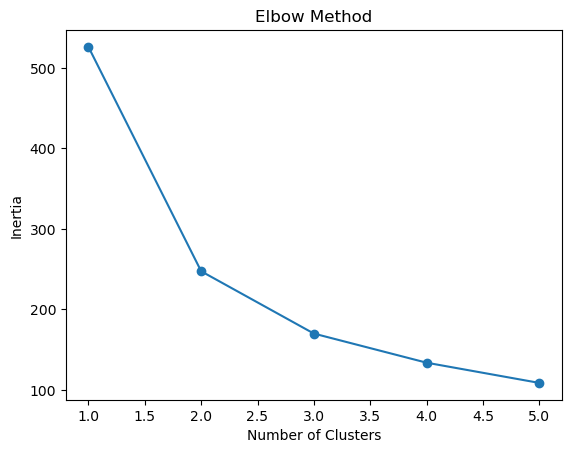

In [44]:
# Elbow method to find the optimal number of clusters
inertia = []
for k in range(1, 6):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df[features])
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.plot(range(1, 6), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [46]:
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(df[features])

In [47]:
df['Sales'].dtype

dtype('float64')

<Axes: xlabel='Sales', ylabel='Quantity_ordered'>

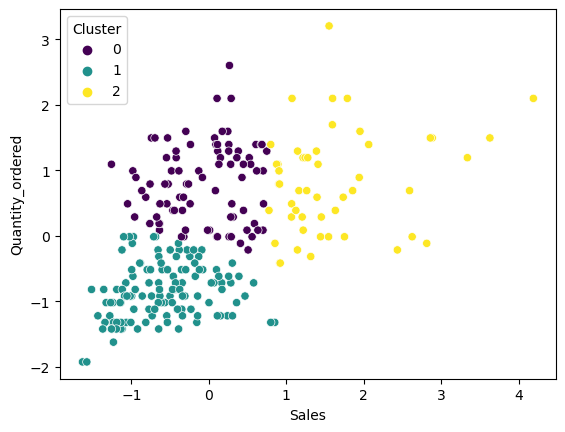

In [51]:
# Visualize clusters
import seaborn as snsSales
sns.scatterplot(data=df, x='Sales', y='Quantity_ordered', hue='Cluster', palette='viridis')

In [53]:
df.head()

,Order_number,Quantity_ordered,Price_each,Order_line_number,Sales,Order_date,Status,Qtr_id,Month_id,Year_id,...,Phone,Address_line1,City,State,Postal_code,Country,Territory,Deal_size,Contact_full_name,Cluster
10,10223,0.286131,100.00,1,0.316579,2/20/2004 0:00,2,1,2,2004,...,03 9520 4555,636 St Kilda Road,3,5,3004,0,0,1.0,Peter Ferguson,0
21,10361,-1.424154,72.55,13,-1.118092,12/17/2004 0:00,2,4,12,2004,...,+61 2 9495 8555,"Monitor Money Building, 815 Pacific Hwy",0,1,2067,0,0,0.0,Adrian Huxley,1
32,10174,-0.015684,100.00,4,2.626718,11/6/2003 0:00,2,4,11,2003,...,61-7-3844-6555,31 Duncan St. West End,7,3,4101,0,0,2.0,Tony Calaghan,2
39,10258,-0.216894,100.00,6,2.436061,6/15/2004 0:00,2,2,6,2004,...,+81 3 3584 0555,2-2-8 Roppongi,4,4,106-0032,1,2,2.0,Akiko Shimamura,2
40,10270,-1.323549,100.00,9,0.852717,7/19/2004 0:00,2,3,7,2004,...,+61 2 9495 8555,"Monitor Money Building, 815 Pacific Hwy",0,1,2067,0,0,1.0,Adrian Huxley,1


In [57]:
kmeans.predict([[0.316579,0.286131]])

array([0])

In [58]:
kmeans.predict([[2.436061,-0.216894]])

array([2])